In [1]:
# Importamos las librerias
import pandas as pd                 # dataframes
import matplotlib.pyplot as plt     # plots
import seaborn as sns               # plots



In [2]:
# Graficar en mapa con latitud y longitud
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as colors
sns.set_style("darkgrid")

### Catalogo

In [3]:
#como leer una archivo json
import json
import requests
url = "https://earthquake.usgs.gov/fdsnws/event/1/application.json"
json=requests.get(url).json()

In [4]:
json.keys()

dict_keys(['catalogs', 'contributors', 'producttypes', 'eventtypes', 'magnitudetypes'])

 A continuación se presenta una lista de las abreviaturas y su significado1:

- time: tiempo en UTC cuando ocurrió el sismo
- latitude: latitud del epicentro en grados
- longitude: longitud del epicentro en grados
- depth: profundidad del epicentro en kilómetros
- mag: magnitud del sismo
- magType: tipo de magnitud
- nst: número de estaciones que registraron el sismo
- gap: ángulo entre las estaciones más lejanas que registraron el sismo
- dmin: distancia mínima entre el epicentro y la estación más cercana en grados
- rms: error de la solución de localización en segundos
- net: red sísmica que detectó el sismo
- id: identificador único del evento sísmico
- updated: tiempo en UTC cuando se actualizó por última vez la información del evento sísmico
- place: ubicación del epicentro del sismo
- type: tipo de evento sísmico
- horizontalError: error horizontal máximo en kilómetros
- depthError: error vertical máximo en kilómetros
- magError: error máximo en la magnitud del sismo
- magNst: número de estaciones que contribuyeron a la determinación de la magnitud

 ### USA

In [5]:
url_usa = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2012-01-01%2000:00:00&endtime=2022-12-31%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=3&orderby=time-asc'

In [6]:
dt_in_usa=pd.read_csv(url_usa,delimiter=',')

In [7]:
dt_in_usa.shape

(13183, 22)

In [8]:
dt_in_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13183 entries, 0 to 13182
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             13183 non-null  object 
 1   latitude         13183 non-null  float64
 2   longitude        13183 non-null  float64
 3   depth            13183 non-null  float64
 4   mag              13183 non-null  float64
 5   magType          13182 non-null  object 
 6   nst              7071 non-null   float64
 7   gap              12808 non-null  float64
 8   dmin             10029 non-null  float64
 9   rms              13033 non-null  float64
 10  net              13183 non-null  object 
 11  id               13183 non-null  object 
 12  updated          13183 non-null  object 
 13  place            13170 non-null  object 
 14  type             13183 non-null  object 
 15  horizontalError  10681 non-null  float64
 16  depthError       12730 non-null  float64
 17  magError    

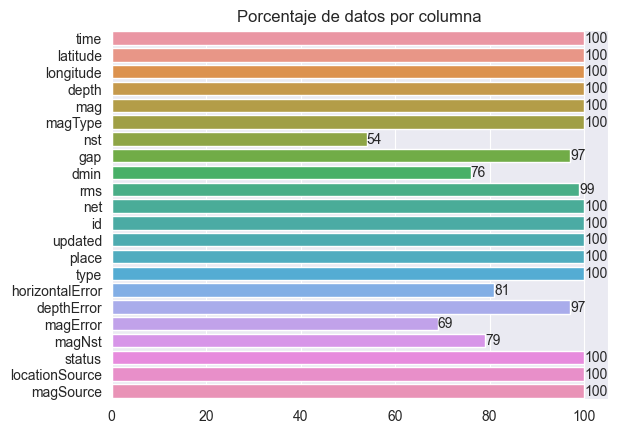

In [9]:
ax = sns.barplot(x = (round(dt_in_usa.notnull().sum()*100/dt_in_usa.shape[0])).values, y = dt_in_usa.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna');

In [10]:
from datetime import datetime

def transformar_fecha(dato):
    fecha_sin_tz = dato.replace("T", " ").replace("Z", "")
    fecha_objeto = datetime.strptime(fecha_sin_tz, "%Y-%m-%d %H:%M:%S.%f")
    fecha_formateada = fecha_objeto.strftime("%Y/%m/%d %H:%M:%S")
    return fecha_formateada

dato = "2012-01-02T21:11:29.890Z"
fecha_transformada = transformar_fecha(dato)
print(fecha_transformada)

2012/01/02 21:11:29


In [37]:
# formatiando la fecha
df_usa = dt_in_usa.copy()

In [12]:
df_usa['time'] = df_usa['time'].apply(lambda x: transformar_fecha(x))
df_usa['updated']= df_usa['updated'].apply(lambda x: transformar_fecha(x))
df_usa

time   latitude   longitude   depth   mag magType   
0      2012/01/02 21:11:29  31.695667 -115.943833   8.626  3.00      ml  \
1      2012/01/03 10:56:58  35.536000  -96.750000   3.600  3.40      ml   
2      2012/01/03 14:18:56  33.194667 -119.449167  18.022  4.14      ml   
3      2012/01/04 20:59:56  43.668000 -105.197000   0.000  3.30      ml   
4      2012/01/05 07:20:10  42.548000 -111.213000   5.000  3.40      ml   
...                    ...        ...         ...     ...   ...     ...   
13178  2022/12/27 03:12:20  32.211900 -103.095100   5.000  3.20   mb_lg   
13179  2022/12/27 17:52:50  45.141500 -106.897200   0.000  3.10      ml   
13180  2022/12/28 13:22:52  39.097600 -118.150300   8.100  3.40      ml   
13181  2022/12/31 11:41:09  34.355667 -116.921833   4.730  3.47      mw   
13182  2022/12/31 12:12:26  33.397500 -116.393333   3.880  4.14      mw   

         nst     gap     dmin     rms  ...              updated   
0        8.0  139.00  0.63730  0.1600  ...  2016/03/11 03:04:16  \
1       49.0   36.30      NaN     NaN  ...  2022/08/08 20:28:15   
2       14.0  206.00      NaN  0.2900  ...  2022/08/06 08:44:02   
3       17.0   76.90      NaN  1.2900  ...  2022/06/09 21:13:36   
4      108.0   44.00      NaN  0.9200  ...  2022/08/09 08:42:58   
...      ...     ...      ...     ...  ...                  ...   
13178   31.0   81.00  0.42900  0.4900  ...  2023/03/07 18:59:52   
13179   26.0   87.00  1.61700  0.6500  ...  2023/03/07 18:59:53   
13180   16.0   52.33  0.06200  0.1008  ...  2023/03/07 18:59:55   
13181  121.0   25.00  0.07845  0.1500  ...  2023/03/07 19:00:01   
13182  132.0   16.00  0.07391  0.1900  ...  2023/04/05 16:03:26   

                                 place              type horizontalError   
0        59km E of Maneadero, B.C., MX        earthquake            0.62  \
1          8 km NW of Prague, Oklahoma        earthquake             NaN   
2        7km SE of San Nicolas Is., CA        earthquake            1.10   
3         25 km ESE of Wright, Wyoming         explosion             NaN   
4       14 km ENE of Georgetown, Idaho        earthquake             NaN   
...                                ...               ...             ...   
13178      14 km NE of Jal, New Mexico        earthquake            1.00   
13179  33 km NE of Ranchester, Wyoming  mining explosion            5.48   
13180        32 km NW of Gabbs, Nevada        earthquake             NaN   
13181   11km SSE of Lucerne Valley, CA        earthquake            0.09   
13182    16km N of Borrego Springs, CA        earthquake            0.10   

      depthError  magError  magNst    status  locationSource magSource  
0         31.610     0.156    83.0  reviewed              ci        ci  
1            NaN       NaN     NaN  reviewed             tul       tul  
2          0.850     0.126    28.0  reviewed              ci        ci  
3            NaN       NaN     NaN  reviewed              us        us  
4            NaN       NaN     NaN  reviewed              us        us  
...          ...       ...     ...       ...             ...       ...  
13178      1.965     0.046   125.0  reviewed              us        us  
13179      1.798     0.046    61.0  reviewed              us        us  
13180      1.400     0.360     5.0  reviewed              nn        nn  
13181      0.410       NaN     4.0  reviewed              ci        ci  
13182      0.380       NaN     6.0  reviewed              ci        ci  

[13183 rows x 22 columns]

In [13]:
def limpiar_place(dato):
    place=dato.split(',')
    lista=[place[0],place[-1]]
    return lista

In [14]:
df_usa['place'].fillna('',inplace=True)

In [15]:
for i in df_usa['place']:
    if type(i)==float:
        print(i)

In [16]:
def limpiar_place(dato):
    place=dato.split(',')
    lista=[place[0],place[-1]]
    return lista

In [17]:

#normalizando place
df_usa[['Reference','Ubicacion']]=df_usa['place'].apply(lambda x: pd.Series(limpiar_place(x)))
df_usa

time   latitude   longitude   depth   mag magType   
0      2012/01/02 21:11:29  31.695667 -115.943833   8.626  3.00      ml  \
1      2012/01/03 10:56:58  35.536000  -96.750000   3.600  3.40      ml   
2      2012/01/03 14:18:56  33.194667 -119.449167  18.022  4.14      ml   
3      2012/01/04 20:59:56  43.668000 -105.197000   0.000  3.30      ml   
4      2012/01/05 07:20:10  42.548000 -111.213000   5.000  3.40      ml   
...                    ...        ...         ...     ...   ...     ...   
13178  2022/12/27 03:12:20  32.211900 -103.095100   5.000  3.20   mb_lg   
13179  2022/12/27 17:52:50  45.141500 -106.897200   0.000  3.10      ml   
13180  2022/12/28 13:22:52  39.097600 -118.150300   8.100  3.40      ml   
13181  2022/12/31 11:41:09  34.355667 -116.921833   4.730  3.47      mw   
13182  2022/12/31 12:12:26  33.397500 -116.393333   3.880  4.14      mw   

         nst     gap     dmin     rms  ...              type horizontalError   
0        8.0  139.00  0.63730  0.1600  ...        earthquake            0.62  \
1       49.0   36.30      NaN     NaN  ...        earthquake             NaN   
2       14.0  206.00      NaN  0.2900  ...        earthquake            1.10   
3       17.0   76.90      NaN  1.2900  ...         explosion             NaN   
4      108.0   44.00      NaN  0.9200  ...        earthquake             NaN   
...      ...     ...      ...     ...  ...               ...             ...   
13178   31.0   81.00  0.42900  0.4900  ...        earthquake            1.00   
13179   26.0   87.00  1.61700  0.6500  ...  mining explosion            5.48   
13180   16.0   52.33  0.06200  0.1008  ...        earthquake             NaN   
13181  121.0   25.00  0.07845  0.1500  ...        earthquake            0.09   
13182  132.0   16.00  0.07391  0.1900  ...        earthquake            0.10   

      depthError magError magNst    status  locationSource  magSource   
0         31.610    0.156   83.0  reviewed              ci         ci  \
1            NaN      NaN    NaN  reviewed             tul        tul   
2          0.850    0.126   28.0  reviewed              ci         ci   
3            NaN      NaN    NaN  reviewed              us         us   
4            NaN      NaN    NaN  reviewed              us         us   
...          ...      ...    ...       ...             ...        ...   
13178      1.965    0.046  125.0  reviewed              us         us   
13179      1.798    0.046   61.0  reviewed              us         us   
13180      1.400    0.360    5.0  reviewed              nn         nn   
13181      0.410      NaN    4.0  reviewed              ci         ci   
13182      0.380      NaN    6.0  reviewed              ci         ci   

                        Reference    Ubicacion  
0             59km E of Maneadero           MX  
1               8 km NW of Prague     Oklahoma  
2       7km SE of San Nicolas Is.           CA  
3             25 km ESE of Wright      Wyoming  
4         14 km ENE of Georgetown        Idaho  
...                           ...          ...  
13178             14 km NE of Jal   New Mexico  
13179      33 km NE of Ranchester      Wyoming  
13180           32 km NW of Gabbs       Nevada  
13181  11km SSE of Lucerne Valley           CA  
13182   16km N of Borrego Springs           CA  

[13183 rows x 24 columns]

In [56]:
df_usa.to_csv('./data/data_limpia_EEUU.csv',index=False)

 ### JAPON

In [18]:
url_japan = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2012-01-01%2000:00:00&endtime=2022-12-31%2023:59:59&minlatitude=27.000000&maxlatitude=44.000000&minlongitude=132.780000&maxlongitude=145.530000&&minmagnitude=3&orderby=time-asc'

In [19]:
dt_in_jap=pd.read_csv(url_japan,delimiter=',')

In [20]:
dt_in_jap.head(4)

time  latitude  longitude  depth  mag magType    nst   
0  2012-01-01T02:45:34.320Z    41.755    144.535   16.5  4.3      mb   44.0  \
1  2012-01-01T05:27:55.980Z    31.456    138.072  365.3  6.8     mww  628.0   
2  2012-01-01T08:31:26.950Z    37.844    141.351   49.5  4.5      mb   51.0   
3  2012-01-01T09:29:43.620Z    37.401    144.748   10.0  4.8      mb  136.0   

     gap  dmin   rms  ...                   updated   
0  134.8   NaN  0.65  ...  2014-11-07T01:46:41.064Z  \
1   10.8   NaN  0.84  ...  2022-05-03T16:54:59.685Z   
2  182.5   NaN  1.19  ...  2014-11-07T01:46:41.609Z   
3   98.2   NaN  0.85  ...  2014-11-07T01:46:41.654Z   

                                 place        type horizontalError depthError   
0           136 km S of Kushiro, Japan  earthquake             NaN       16.3  \
1            Izu Islands, Japan region  earthquake             NaN        2.7   
2           48 km ESE of Watari, Japan  earthquake             NaN        8.0   
3  off the east coast of Honshu, Japan  earthquake             NaN        NaN   

   magError  magNst    status  locationSource magSource  
0       NaN    12.0  reviewed              us        us  
1       NaN     NaN  reviewed              us        us  
2       NaN    21.0  reviewed              us        us  
3       NaN    72.0  reviewed              us        us  

[4 rows x 22 columns]

In [49]:
df_japan=dt_in_jap.copy()

In [50]:
df_japan['time'] = df_japan['time'].apply(lambda x: transformar_fecha(x))
df_japan['updated']= df_japan['updated'].apply(lambda x: transformar_fecha(x))
df_japan

time  latitude  longitude    depth  mag magType    nst   
0     2012/01/01 02:45:34   41.7550   144.5350   16.500  4.3      mb   44.0  \
1     2012/01/01 05:27:55   31.4560   138.0720  365.300  6.8     mww  628.0   
2     2012/01/01 08:31:26   37.8440   141.3510   49.500  4.5      mb   51.0   
3     2012/01/01 09:29:43   37.4010   144.7480   10.000  4.8      mb  136.0   
4     2012/01/02 18:28:25   36.3580   141.6490   18.600  4.9      mb  186.0   
...                   ...       ...        ...      ...  ...     ...    ...   
8545  2022/12/27 14:48:11   38.3241   141.9852   72.059  4.3      mb   24.0   
8546  2022/12/27 18:51:17   37.8210   141.8199   57.410  4.6      mb  247.0   
8547  2022/12/28 16:47:09   33.4622   133.9125   30.087  4.3     mwr  108.0   
8548  2022/12/30 14:10:06   36.1139   139.8576   56.826  4.4      mb   34.0   
8549  2022/12/30 16:44:48   27.0439   141.2072   14.666  4.5      mb   24.0   

        gap   dmin   rms  ...              updated   
0     134.8    NaN  0.65  ...  2014/11/07 01:46:41  \
1      10.8    NaN  0.84  ...  2022/05/03 16:54:59   
2     182.5    NaN  1.19  ...  2014/11/07 01:46:41   
3      98.2    NaN  0.85  ...  2014/11/07 01:46:41   
4      92.8    NaN  1.01  ...  2014/11/07 01:46:42   
...     ...    ...   ...  ...                  ...   
8545  186.0  2.563  0.44  ...  2023/03/07 19:00:07   
8546   95.0  3.022  0.57  ...  2023/03/07 18:59:53   
8547   59.0  0.270  0.50  ...  2023/03/07 18:59:56   
8548  136.0  1.398  0.35  ...  2023/03/07 19:00:00   
8549  185.0  0.867  1.15  ...  2023/03/07 19:00:10   

                                    place        type horizontalError   
0              136 km S of Kushiro, Japan  earthquake             NaN  \
1               Izu Islands, Japan region  earthquake             NaN   
2              48 km ESE of Watari, Japan  earthquake             NaN   
3     off the east coast of Honshu, Japan  earthquake             NaN   
4            92 km ESE of Takahagi, Japan  earthquake             NaN   
...                                   ...         ...             ...   
8545         60 km E of Ishinomaki, Japan  earthquake            9.76   
8546        80 km SE of Ishinomaki, Japan  earthquake            4.45   
8547               4 km SSE of Aki, Japan  earthquake            5.74   
8548             5 km ENE of Sakai, Japan  earthquake            6.33   
8549          Bonin Islands, Japan region  earthquake           10.96   

     depthError  magError  magNst    status  locationSource magSource  
0        16.300       NaN    12.0  reviewed              us        us  
1         2.700       NaN     NaN  reviewed              us        us  
2         8.000       NaN    21.0  reviewed              us        us  
3           NaN       NaN    72.0  reviewed              us        us  
4        12.200       NaN   110.0  reviewed              us        us  
...         ...       ...     ...       ...             ...       ...  
8545     12.034     0.187     8.0  reviewed              us        us  
8546      4.702     0.038   215.0  reviewed              us        us  
8547      3.110     0.071    19.0  reviewed              us        us  
8548      7.978     0.130    17.0  reviewed              us        us  
8549      7.622     0.145    14.0  reviewed              us        us  

[8550 rows x 22 columns]

In [52]:
df_japan['place'].fillna('',inplace=True)

In [53]:
#normalizando place
df_japan[['Reference','Ubicacion']]=df_japan['place'].apply(lambda x: pd.Series(limpiar_place(x)))
df_usa.to_csv('./data/data_limpia_japan.csv',index=False)

In [65]:
df_usa.to_csv('./data/data_limpia_japan.csv',index=False)

In [21]:
dt_in_jap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8550 non-null   object 
 1   latitude         8550 non-null   float64
 2   longitude        8550 non-null   float64
 3   depth            8550 non-null   float64
 4   mag              8550 non-null   float64
 5   magType          8550 non-null   object 
 6   nst              2165 non-null   float64
 7   gap              8550 non-null   float64
 8   dmin             6998 non-null   float64
 9   rms              8550 non-null   float64
 10  net              8550 non-null   object 
 11  id               8550 non-null   object 
 12  updated          8550 non-null   object 
 13  place            8498 non-null   object 
 14  type             8550 non-null   object 
 15  horizontalError  6066 non-null   float64
 16  depthError       8113 non-null   float64
 17  magError      

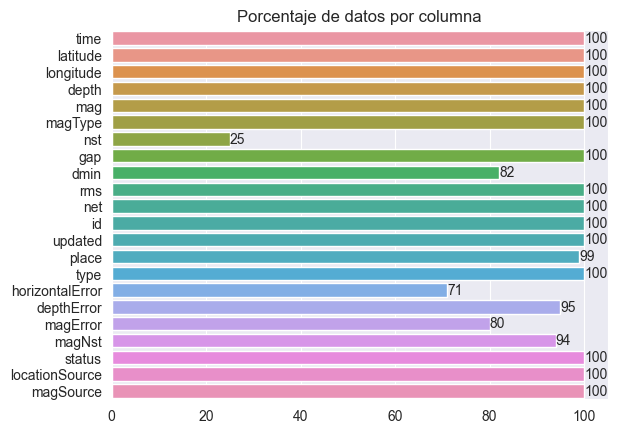

In [22]:
ax = sns.barplot(x = (round(dt_in_jap.notnull().sum()*100/dt_in_jap.shape[0])).values, y = dt_in_jap.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna');

###  Chile

In [23]:
url_chile = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2012-01-01%2000:00:00&endtime=2022-12-31%2023:59:59&minlatitude=-56.800000&maxlatitude=-19.000000&minlongitude=-79.000000&maxlongitude=-69.900000&jsonerror=true'

In [24]:
dt_in_ch=pd.read_csv(url_chile,delimiter=",")

In [25]:
dt_in_ch.head(4)

time  latitude  longitude   depth  mag magType   nst   
0  2022-12-31T12:47:57.797Z  -32.2655   -71.5683  48.006  4.5     mwr  62.0  \
1  2022-12-30T05:19:18.616Z  -45.8405   -76.4020  12.929  5.3     mww  72.0   
2  2022-12-30T01:49:19.109Z  -27.6260   -70.1895  92.000  4.4     mwr  47.0   
3  2022-12-28T20:38:09.159Z  -30.6390   -71.3043  61.219  4.5     mwr  56.0   

     gap   dmin   rms  ...                   updated   
0   69.0  0.550  0.80  ...  2023-03-07T19:00:01.040Z  \
1  141.0  2.146  0.58  ...  2023-03-07T18:59:59.040Z   
2   75.0  0.051  0.62  ...  2023-03-07T18:59:58.040Z   
3   76.0  0.287  0.85  ...  2023-03-07T18:59:56.040Z   

                                 place        type horizontalError depthError   
0         37 km WNW of La Ligua, Chile  earthquake            2.52      4.620  \
1  282 km W of Puerto Chacabuco, Chile  earthquake            8.82      4.482   
2          31 km SSE of Copiapó, Chile  earthquake            5.27      2.825   
3           10 km WSW of Ovalle, Chile  earthquake            3.42      4.286   

   magError  magNst    status  locationSource magSource  
0     0.039    63.0  reviewed              us        us  
1     0.050    39.0  reviewed              us        us  
2     0.058    29.0  reviewed              us        us  
3     0.055    32.0  reviewed              us        us  

[4 rows x 22 columns]

In [57]:
df_chile=dt_in_ch.copy()

In [60]:
df_chile['time'] = df_chile['time'].apply(lambda x: transformar_fecha(x))
df_chile['updated']= df_chile['updated'].apply(lambda x: transformar_fecha(x))
df_chile

time  latitude  longitude   depth  mag magType    nst   
0     2022/12/31 12:47:57  -32.2655   -71.5683  48.006  4.5     mwr   62.0  \
1     2022/12/30 05:19:18  -45.8405   -76.4020  12.929  5.3     mww   72.0   
2     2022/12/30 01:49:19  -27.6260   -70.1895  92.000  4.4     mwr   47.0   
3     2022/12/28 20:38:09  -30.6390   -71.3043  61.219  4.5     mwr   56.0   
4     2022/12/28 10:45:02  -45.8983   -76.2216  10.000  4.4     mwr   27.0   
...                   ...       ...        ...     ...  ...     ...    ...   
5665  2012/01/05 09:17:35  -27.9210   -71.1430  45.800  4.6      mb   30.0   
5666  2012/01/05 00:54:31  -45.9920   -76.4720  10.000  5.3      mb  101.0   
5667  2012/01/03 21:50:22  -36.9940   -74.0840  25.100  4.6      mb   38.0   
5668  2012/01/01 21:58:16  -34.9200   -72.7590  34.700  4.1      ml    9.0   
5669  2012/01/01 18:50:43  -26.9130   -71.1050  45.200  4.6      mb   21.0   

        gap   dmin   rms  ...              updated   
0      69.0  0.550  0.80  ...  2023/03/07 19:00:01  \
1     141.0  2.146  0.58  ...  2023/03/07 18:59:59   
2      75.0  0.051  0.62  ...  2023/03/07 18:59:58   
3      76.0  0.287  0.85  ...  2023/03/07 18:59:56   
4     142.0  2.046  0.32  ...  2023/03/07 18:59:55   
...     ...    ...   ...  ...                  ...   
5665  122.0    NaN   NaN  ...  2014/11/07 01:46:43   
5666   80.6    NaN  0.93  ...  2014/11/07 01:46:43   
5667  151.8    NaN   NaN  ...  2014/11/07 01:46:42   
5668  209.9    NaN   NaN  ...  2014/11/07 01:46:42   
5669  122.8    NaN   NaN  ...  2014/11/07 01:46:42   

                                    place        type horizontalError   
0            37 km WNW of La Ligua, Chile  earthquake            2.52  \
1     282 km W of Puerto Chacabuco, Chile  earthquake            8.82   
2             31 km SSE of Copiapó, Chile  earthquake            5.27   
3              10 km WSW of Ovalle, Chile  earthquake            3.42   
4     269 km W of Puerto Chacabuco, Chile  earthquake            8.97   
...                                   ...         ...             ...   
5665         81 km NNW of Vallenar, Chile  earthquake             NaN   
5666  290 km W of Puerto Chacabuco, Chile  earthquake             NaN   
5667           73 km WNW of Arauco, Chile  earthquake             NaN   
5668      55 km NW of Constitución, Chile  earthquake             NaN   
5669          91 km WNW of Copiapó, Chile  earthquake             NaN   

     depthError  magError  magNst    status  locationSource magSource  
0         4.620     0.039    63.0  reviewed              us        us  
1         4.482     0.050    39.0  reviewed              us        us  
2         2.825     0.058    29.0  reviewed              us        us  
3         4.286     0.055    32.0  reviewed              us        us  
4         1.934     0.060    27.0  reviewed              us        us  
...         ...       ...     ...       ...             ...       ...  
5665        NaN       NaN     1.0  reviewed             guc        us  
5666        NaN       NaN    68.0  reviewed              us        us  
5667        NaN       NaN    11.0  reviewed             guc        us  
5668        NaN       NaN     NaN  reviewed             guc       guc  
5669        NaN       NaN     2.0  reviewed             guc        us  

[5670 rows x 22 columns]

In [61]:
df_chile['place'].fillna('',inplace=True)

In [62]:
df_chile[['Reference','Ubicacion']]=df_chile['place'].apply(lambda x: pd.Series(limpiar_place(x)))


In [64]:
df_chile.to_csv('./data/data_limpia_chile.csv',index=False)

In [26]:
dt_in_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5670 non-null   object 
 1   latitude         5670 non-null   float64
 2   longitude        5670 non-null   float64
 3   depth            5670 non-null   float64
 4   mag              5670 non-null   float64
 5   magType          5670 non-null   object 
 6   nst              653 non-null    float64
 7   gap              5049 non-null   float64
 8   dmin             4603 non-null   float64
 9   rms              5379 non-null   float64
 10  net              5670 non-null   object 
 11  id               5670 non-null   object 
 12  updated          5670 non-null   object 
 13  place            5664 non-null   object 
 14  type             5670 non-null   object 
 15  horizontalError  4228 non-null   float64
 16  depthError       5330 non-null   float64
 17  magError      

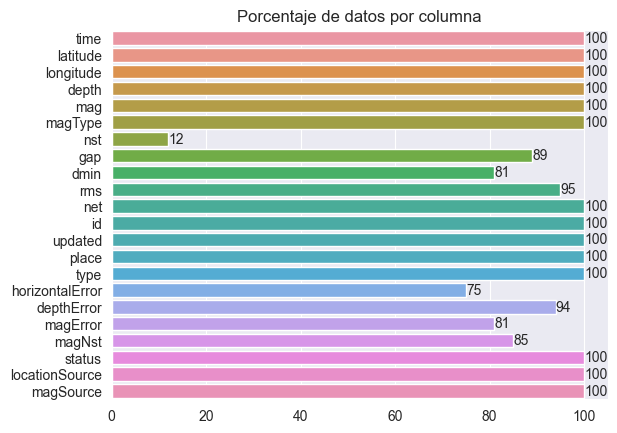

In [27]:
ax = sns.barplot(x = (round(dt_in_ch.notnull().sum()*100/dt_in_ch.shape[0])).values, y = dt_in_ch.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna');

grafica

In [28]:
dt_ini_con=pd.concat([dt_in_usa,dt_in_jap,dt_in_ch])

In [29]:
dt_ini_con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27403 entries, 0 to 5669
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             27403 non-null  object 
 1   latitude         27403 non-null  float64
 2   longitude        27403 non-null  float64
 3   depth            27403 non-null  float64
 4   mag              27403 non-null  float64
 5   magType          27402 non-null  object 
 6   nst              9889 non-null   float64
 7   gap              26407 non-null  float64
 8   dmin             21630 non-null  float64
 9   rms              26962 non-null  float64
 10  net              27403 non-null  object 
 11  id               27403 non-null  object 
 12  updated          27403 non-null  object 
 13  place            27332 non-null  object 
 14  type             27403 non-null  object 
 15  horizontalError  20975 non-null  float64
 16  depthError       26173 non-null  float64
 17  magError         2

C:\Users\carlo\AppData\Local\Temp\ipykernel_3780\1926176227.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


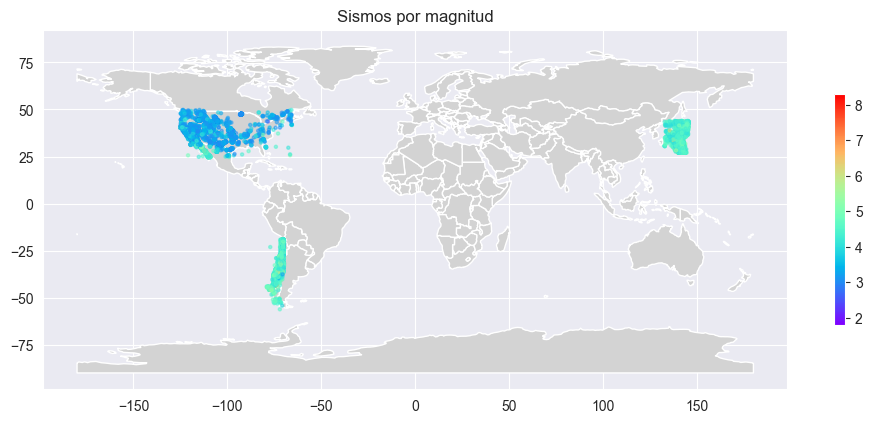

In [30]:
# https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
# Escogemos el mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Creamos el objeto geodataframe
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(dt_ini_con['longitude'], dt_ini_con['latitude'])]
geo_df = gpd.GeoDataFrame(dt_ini_con, 
                          crs = crs, 
                          geometry = geometry)

# por magnitud
fig, ax = plt.subplots(figsize = (12,10))

world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

geo_df.plot(column = 'mag', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 5, alpha=0.5)
            
ax.set_title('Sismos por magnitud');